# Neural Network with Quadratic Data
- y = x^2+3
- 3 hidden layers

## 1.Import Required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
#from torch.autograd import Variable

In [2]:
from visdom import Visdom
viz = Visdom()

Setting up a new session...


## 2. Data Generation

In [3]:
num_data = 1000
#num_epoch = 500
num_epoch = 3000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)

x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 

#y_noise = y + noise
y_noise = (x+noise)**2 + 3 

In [4]:
# visualize data

import numpy as np

input_data = torch.cat([x,y_noise],1)

win=viz.scatter(
    X = input_data,
    opts=dict(
        xtickmin=-15,
        xtickmax=15,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)
'''
viz.updateTrace(
    X = x,
    Y = y,
    win=win,
)
'''
line_data = torch.cat([x,y],1)
win=viz.scatter(
    X = line_data,
    win=win,
    update='append')

## 3. Model & Optimizer

In [5]:
# fully connected model with 3 hidden layer

model = nn.Sequential(    # NN의 레이어를 nn.Sequential로 묶어서 NN 모델을 정의함.   클래스 라이브러리
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1),
    )

loss_func = nn.L1Loss()    # $ L1Loss(x,y) = \frac{1}{n} \sum | \hat{y_i} - y_i | $
optimizer = optim.SGD(model.parameters(),lr=0.0005)

## 4. Train 

In [14]:
loss_arr =[]

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)

    loss = loss_func(output,y_noise)
    loss.backward()      # gradient calculation : $\frac{\partial loss}{\partial w_i}$
    optimizer.step()      # one step of SGD : $ w_{t+1} = w_t - gradient \times learning \, rate $
    
    if i % 100 ==0:
        print(loss.data)
    
    loss_arr.append(loss.data)

tensor(11.8161)
tensor(11.8144)
tensor(11.8134)
tensor(11.8112)
tensor(11.8086)
tensor(11.8078)
tensor(11.8063)
tensor(11.8043)
tensor(11.8030)
tensor(11.8018)
tensor(11.8010)
tensor(11.8001)
tensor(11.7991)
tensor(11.7982)
tensor(11.7974)
tensor(11.7965)
tensor(11.7955)
tensor(11.7937)
tensor(11.7901)
tensor(11.7878)
tensor(11.7863)
tensor(11.7844)
tensor(11.7830)
tensor(11.7819)
tensor(11.7810)
tensor(11.7802)
tensor(11.7795)
tensor(11.7789)
tensor(11.7782)
tensor(11.7775)


Connection is already closed.
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
Connection is already closed.
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다


In [9]:
param_list = list(model.parameters())
print(param_list)

[Parameter containing:
tensor([[ 1.1328],
        [-0.0592],
        [ 0.2261],
        [-1.1149],
        [ 0.8837],
        [-0.7084]], requires_grad=True), Parameter containing:
tensor([-0.5028, -0.8859, -1.6219, -0.0196, -0.4200, -1.5939],
       requires_grad=True), Parameter containing:
tensor([[-0.3607,  0.3549, -0.0536, -0.0118, -0.1810,  0.4191],
        [ 0.2821, -0.1469,  1.2512,  0.5238,  0.3419,  1.0025],
        [-0.2147, -0.1420, -0.2450, -0.1839, -0.0820,  0.4443],
        [ 0.0645, -0.2535,  0.0610, -0.1911, -0.1353,  0.2141],
        [ 0.2043,  0.2472,  0.4279, -0.3475, -0.1916, -0.0653],
        [ 0.0950,  0.0804, -0.2013,  0.3127, -0.1980,  0.0013],
        [ 0.5559, -0.2006,  0.9727, -0.2809,  0.3053,  1.2146],
        [ 0.0931, -0.1720, -0.4009, -0.3994, -0.3165,  0.0295],
        [ 0.4879, -0.0322, -0.1388, -0.2452,  0.3817,  0.2008],
        [ 0.2856, -0.0739,  0.1839,  0.0952, -0.3145, -0.1288]],
       requires_grad=True), Parameter containing:
tensor([-0.2032

## 5. Visualize Trained Output

In [7]:
win2=viz.scatter(
    X = input_data,
    opts=dict(
        xtickmin=-15,
        xtickmax=15,
        xtickstep=1,
        ytickmin=0,
        ytickmax=500,
        ytickstep=1,
        markersymbol='dot',
        markercolor=np.random.randint(0, 255, num_data),
        markersize=5,
    ),
)

'''
viz.updateTrace(
    X = x,
    Y = output.cpu().data,
    win = win2,
)
'''
output_data = torch.cat([x,output.data],1)
win2=viz.scatter(
    X = output_data,
    win = win2,
    update='append')

## 6. Visualize Loss Graph

In [76]:
x = np.reshape([i for i in range(num_epoch)],newshape=[num_epoch,1])
loss_data = np.reshape(loss_arr,newshape=[num_epoch,1])

win3=viz.line(
    X = x,
    Y = loss_data,
)

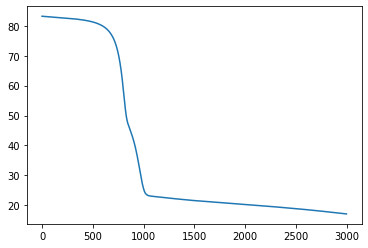

In [77]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.show()